# **QUESTION 2**

In [23]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

In [2]:
directories = {
    'D:/MSc/SEMESTER 3/DL/MY_data/train/Apple' : 0,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/avocado': 1,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/Banana': 2,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/cherry': 3,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/kiwi': 4,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/mango': 5,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/orange': 6,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/pinenapple': 7,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/strawberries': 8,
    'D:/MSc/SEMESTER 3/DL/MY_data/train/watermelon': 9
}


In [12]:
directories_test = {
    'D:/MSc/SEMESTER 3/DL/MY_data/test/Apple': 0,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/avocado': 1,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/Banana': 2,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/cherry': 3,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/kiwi': 4,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/mango': 5,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/orange': 6,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/pinenapple': 7,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/stawberries': 8,
    'D:/MSc/SEMESTER 3/DL/MY_data/test/watermelon': 9
}


In [53]:
directories_predict = {
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/Apple': 0,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/avocado': 1,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/Banana': 2,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/cherry': 3,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/kiwi': 4,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/mango': 5,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/orange': 6,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/pinenapple': 7,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/stawberries': 8,
    'D:/MSc/SEMESTER 3/DL/MY_data/predict/watermelon': 9
}


In [15]:
def preprocess_images(directory, size=(100, 100)):
    images = []
    labels = []
    for subdir, label in directory.items():
        files = os.listdir(subdir)
        for file in files:
            img_path = os.path.join(subdir, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, size)
                img = img.astype('float32') / 255.0
                images.append(img)
                labels.append(label)
            else:
                print(f"Failed to read image: {img_path}")
    return np.array(images), np.array(labels)

images_train, labels_train = preprocess_images(directories)


images_test, labels_test = preprocess_images(directories_test)


X_train, X_val, y_train, y_val = train_test_split(images_train, labels_train, test_size=0.3, random_state=42)


Failed to read image: D:/MSc/SEMESTER 3/DL/MY_data/train/orange\img_2731.jpeg


In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [16]:
# Print the shapes of the datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (1610, 100, 100, 3)
Validation set shape: (690, 100, 100, 3)
Test set shape: (207, 100, 100, 3)
Training labels shape: (1610,)
Validation labels shape: (690,)
Test labels shape: (207,)


# ***CNN Architecture***

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.utils import to_categorical

In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\noelm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,539,018 (36.39 MB)

 Trainable params: 9,537,546 (36.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [27]:

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train_encoded, batch_size=32, epochs=10, validation_data=(X_val, y_val_encoded))


Epoch 1/10
13/51 ━━━━━━━━━━━━━━━━━━━━ 17s 448ms/step - accuracy: 0.2206 - loss: 2.6952

51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 489ms/step - accuracy: 0.3097 - loss: 2.2849 - val_accuracy: 0.1362 - val_loss: 2.6450
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 448ms/step - accuracy: 0.5380 - loss: 1.3315 - val_accuracy: 0.0957 - val_loss: 3.2496
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 478ms/step - accuracy: 0.6923 - loss: 0.9119 - val_accuracy: 0.1507 - val_loss: 3.5614
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 25s 481ms/step - accuracy: 0.7768 - loss: 0.6981 - val_accuracy: 0.0971 - val_loss: 3.8006
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 506ms/step - accuracy: 0.8760 - loss: 0.4101 - val_accuracy: 0.0971 - val_loss: 4.7017
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 584ms/step - accuracy: 0.8988 - loss: 0.3529 - val_accuracy: 0.1609 - val_loss: 3.3060
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 549ms/step - accuracy: 0.9322 - loss: 0.2204 - val_accuracy: 0.1783 - val_loss: 3.3800
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 546ms/step - accuracy: 0.9704 - loss: 0.1304 - val_accuracy: 0.262

In [28]:

X_test, y_test = images_test, labels_test
y_test_encoded = to_categorical(y_test)

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.5429 - loss: 1.5466
Test Loss: 1.7380021810531616, Test Accuracy: 0.5141463279724121


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


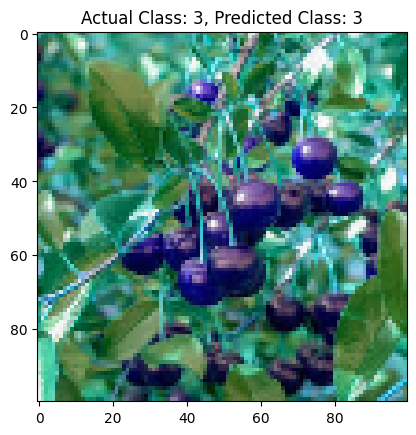

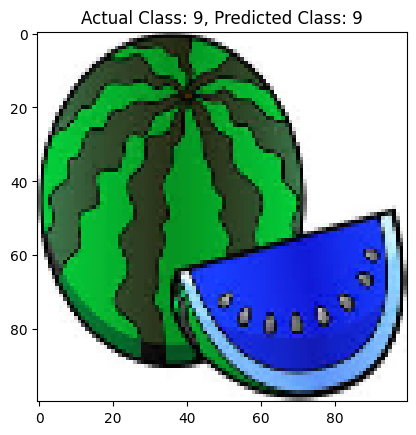

In [30]:
random_indices = np.random.choice(len(X_train), 2, replace=False)


random_images = X_train[random_indices]
random_labels = y_train[random_indices]

predictions = model.predict(random_images)


for i in range(2):
    plt.imshow(random_images[i])
    plt.title(f"Actual Class: {random_labels[i]}, Predicted Class: {np.argmax(predictions[i])}")
    plt.show()

# ***VGG16 Model***

In [54]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import regularizers

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

model1 = Sequential()


model1.add(vgg16_base)

model1.add(Flatten())


model1.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.5)) 


model1.add(Dense(10, activation='softmax'))

In [34]:
from tensorflow.keras.optimizers import Adam
model1.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history_VGG16 = model1.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 171s 4s/step - accuracy: 0.7732 - loss: 4.7293 - val_accuracy: 0.5839 - val_loss: 3.8932
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.9006 - loss: 2.7572 - val_accuracy: 0.7391 - val_loss: 2.5706
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - accuracy: 0.9101 - loss: 1.9235 - val_accuracy: 0.7298 - val_loss: 2.1367
Epoch 4/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.9164 - loss: 1.5840 - val_accuracy: 0.6925 - val_loss: 2.1891
Epoch 5/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.9039 - loss: 1.5044 - val_accuracy: 0.6957 - val_loss: 2.1207


In [45]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

27/33 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7009 - loss: 2.1605

33/33 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.6931 - loss: 2.1866
Test Loss: 2.3393476009368896
Test Accuracy: 0.6565853953361511


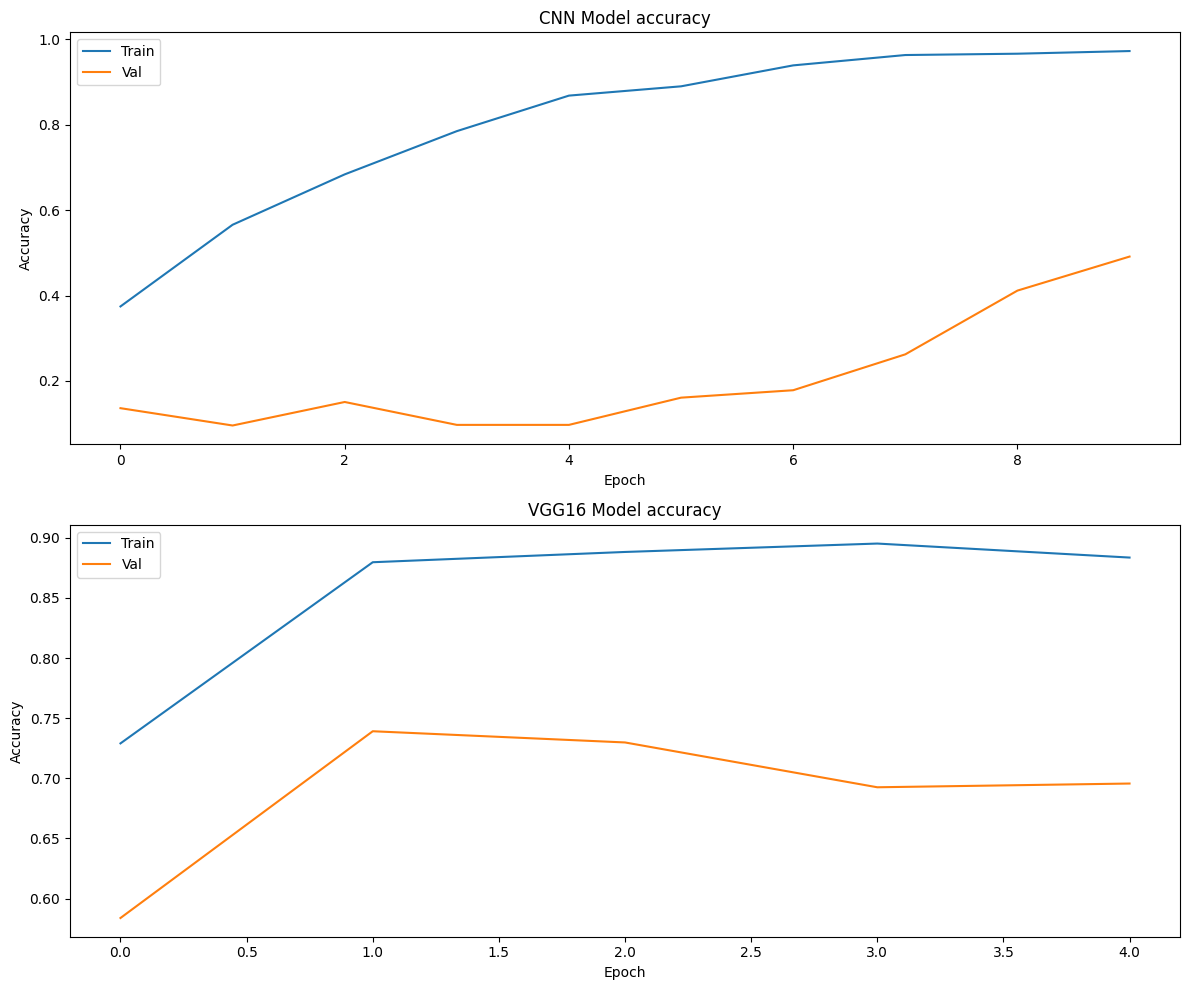

In [42]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')



plt.subplot(2,1,2)
plt.plot(history_VGG16.history['accuracy'])
plt.plot(history_VGG16.history['val_accuracy'])
plt.title('VGG16 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


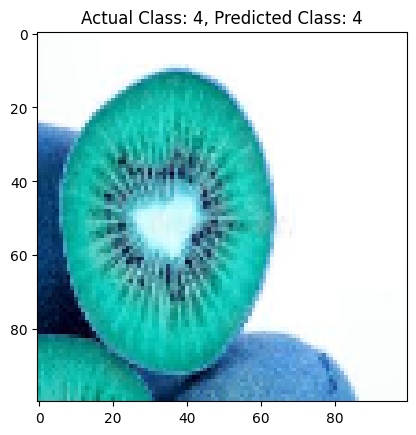

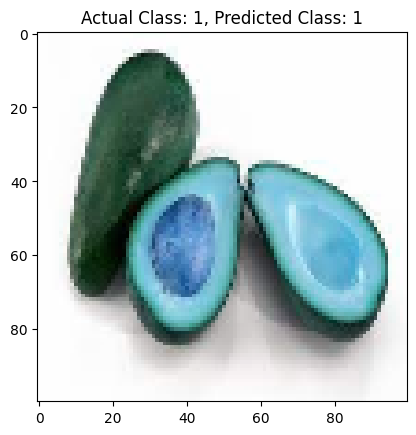

In [43]:
random_indices = np.random.choice(len(X_train), 2, replace=False)

# Selecting corresponding images and labels
random_images = X_train[random_indices]
random_labels = y_train[random_indices]

# Predicting classes
predictions = model1.predict(random_images)

# Displaying images with predicted and actual labels
for i in range(2):
    plt.imshow(random_images[i])
    plt.title(f"Actual Class: {random_labels[i]}, Predicted Class: {np.argmax(predictions[i])}")
    plt.show()

 1/22 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step

22/22 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step


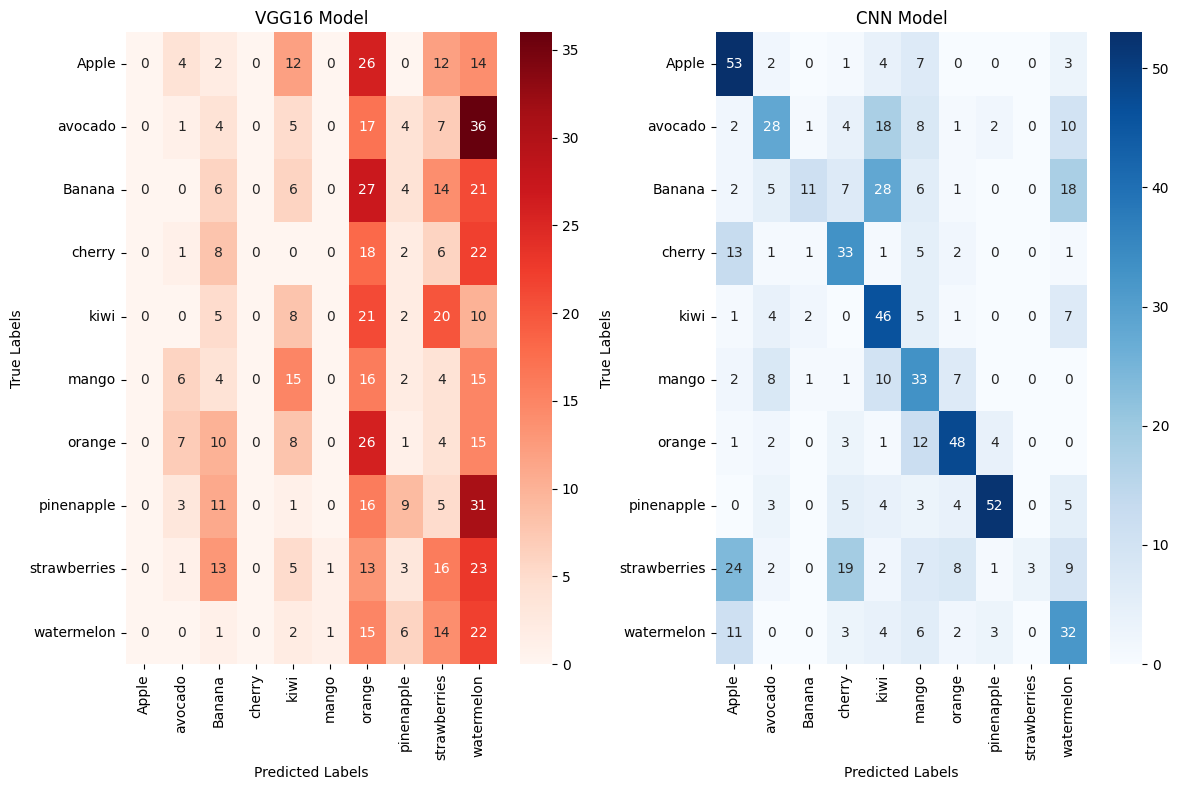

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_labels = [
    'Apple', 'avocado', 'Banana', 'cherry', 
    'kiwi', 'mango', 'orange', 'pinenapple', 
    'strawberries', 'watermelon'
]

#VGG16
y_pred = model1.predict(X_val)
y_pred_classes = np.argmax(y_pred , axis =1)

y_pred_labels = [class_labels[i] for i in y_pred_classes]
y_true_labels = [class_labels[i] for i in y_val]

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)


#CNNN
y_pred1 = model.predict(X_val)
y_pred_classes1 = np.argmax(y_pred1 , axis =1)

y_pred_labels1 = [class_labels[i] for i in y_pred_classes1]
y_true_labels1 = [class_labels[i] for i in y_val]

conf_matrix1 = confusion_matrix(y_true_labels1, y_pred_labels1)


plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',  xticklabels=class_labels, yticklabels=class_labels)
plt.title('VGG16 Model')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")


plt.subplot(1,2,2)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues',  xticklabels=class_labels, yticklabels=class_labels)
plt.title('CNN Model')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")


plt.tight_layout()
plt.show()